# Benchmark on big neuron dataset

In [1]:
import pandas as pd
import numpy as np
from matplotlib import ticker
import seaborn as sns
df = pd.read_csv(r"D:\rectify\bigneuron_eval.csv", index_col=0)
df['raw_f1'] = 2 * (df['raw_precision'] * df['raw_recall']) / (df['raw_precision'] + df['raw_recall'] + .00001)
df['guo_f1'] = 2 * (df['guo_precision'] * df['guo_recall']) / (df['guo_precision'] + df['guo_recall'] + .00001)
df['mul_f1'] = 2 * (df['mul_precision'] * df['mul_recall']) / (df['mul_precision'] + df['mul_recall'] + .00001)
df['ada_f1'] = 2 * (df['ada_precision'] * df['ada_recall']) / (df['ada_precision'] + df['ada_recall'] + .00001)
df['my_f1'] = 2 * (df['my_precision'] * df['my_recall']) / (df['my_precision'] + df['my_recall'] + .00001)

def convert_pvalue_to_asterisks(pvalue):
    if pvalue <= 0.0001:
        return "****"
    elif pvalue <= 0.001:
        return "***"
    elif pvalue <= 0.01:
        return "**"
    elif pvalue <= 0.05:
        return "*"
    return "ns"

df.mean()

raw_recall       0.834098
my_recall        0.909584
guo_recall       0.863967
ada_recall       0.792350
mul_recall       0.734650
raw_precision    0.827969
my_precision     0.847204
guo_precision    0.747805
ada_precision    0.855476
mul_precision    0.919328
raw_f1           0.740914
guo_f1           0.728597
mul_f1           0.740740
ada_f1           0.761339
my_f1            0.856471
dtype: float64

Text(4, 0.9064706123341809, '0.86')

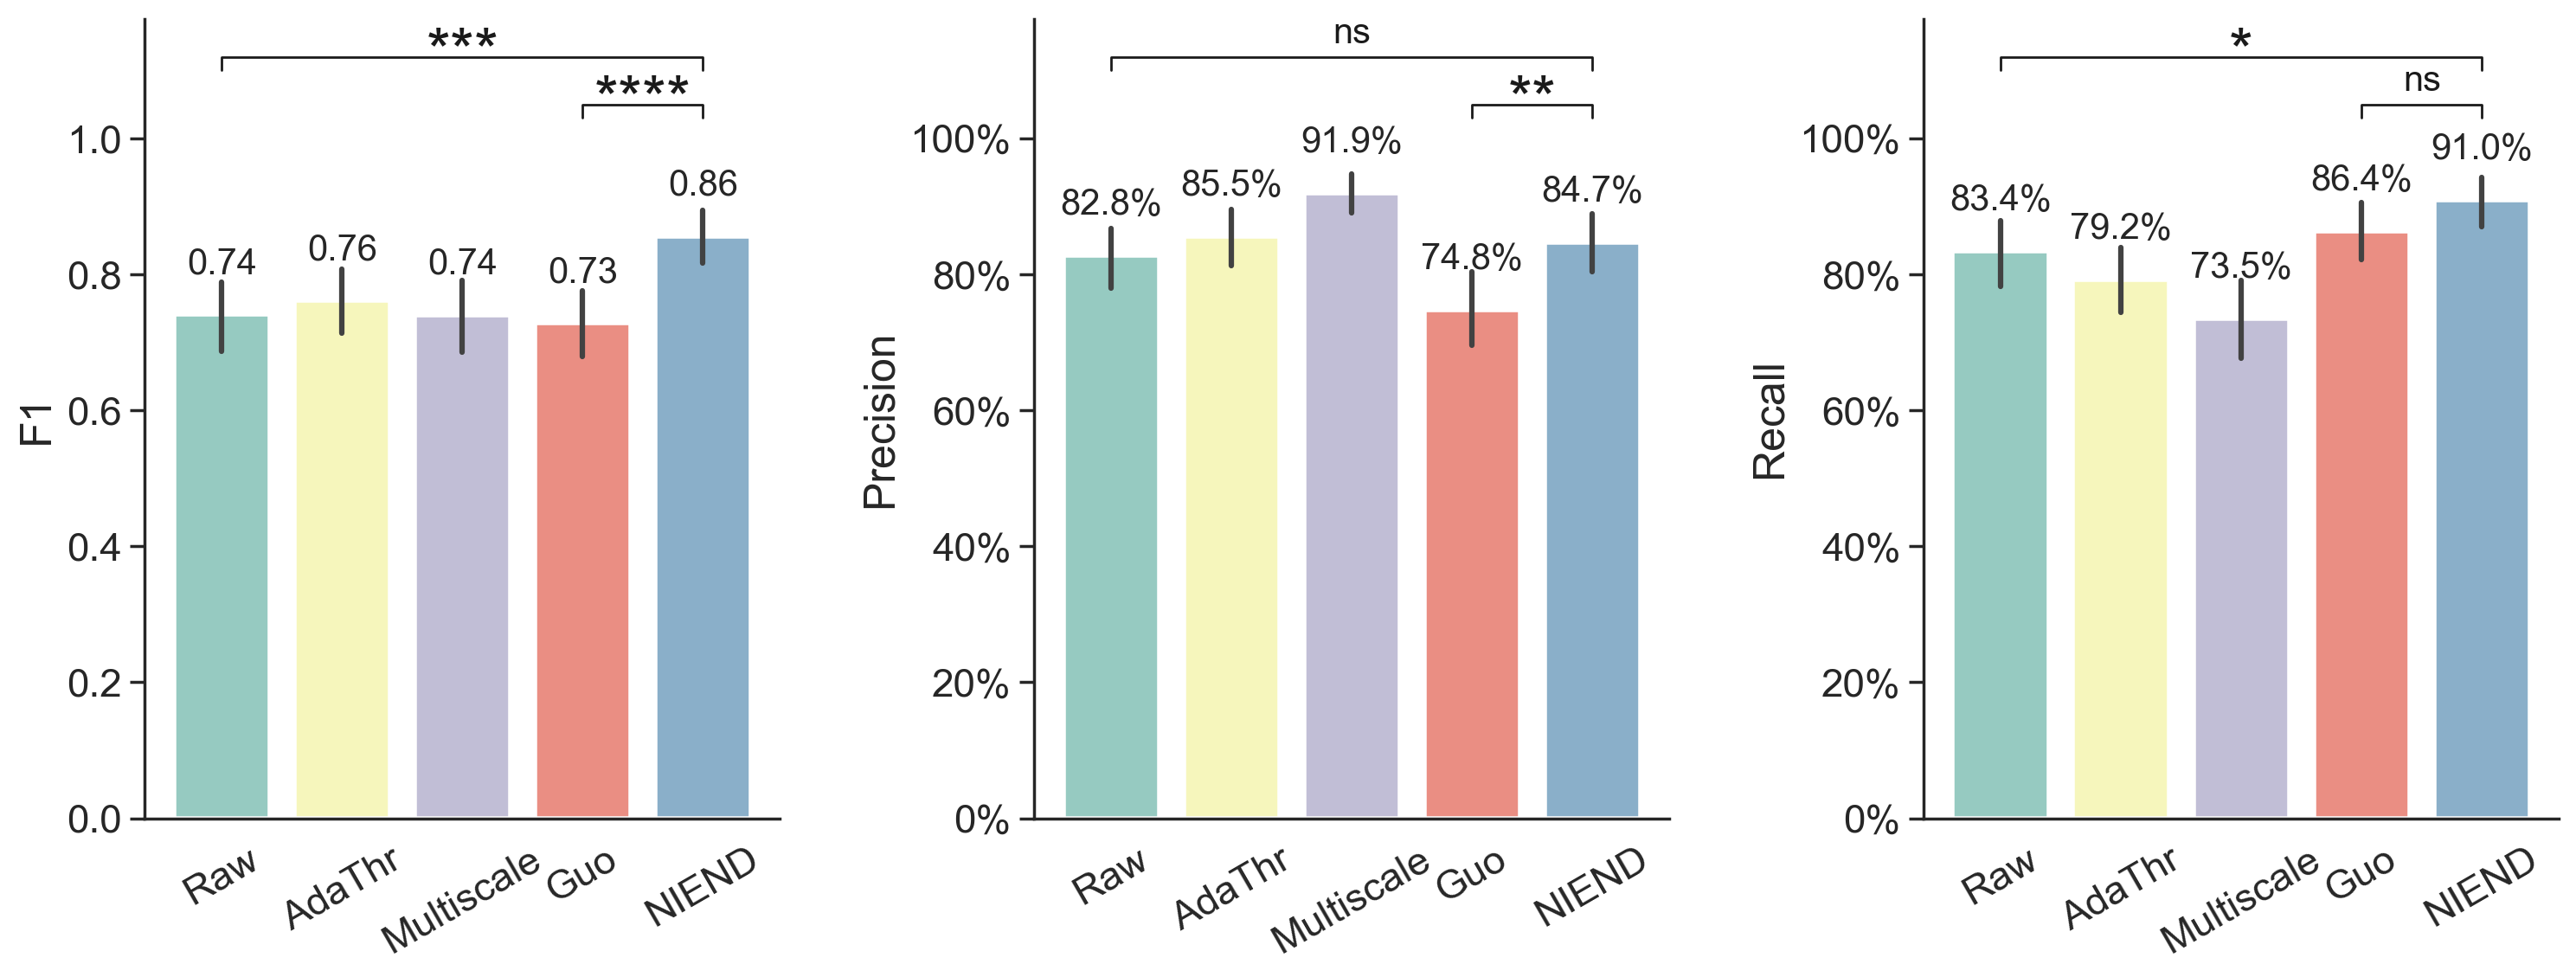

In [5]:
from scipy.stats import  ttest_ind

m = df.mean()

def test(ax, x1, x2, y, h, fs, a, b, shift=0):
    ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c="k")
    stat,p_value = ttest_ind(a, b)
    ax.text((x1+x2)*.5, y - h + shift, convert_pvalue_to_asterisks(p_value), ha='center', va='bottom', color="k", fontsize=fs)

# plot precision
sns.set(font_scale=1.5, style='white')
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 3, figsize=(18, 6), dpi=200)
plt.subplots_adjust(wspace=0.4)
sns.despine(fig, top=True, right=True)
ax = sns.barplot(data=df[['raw_precision', 'ada_precision', 'mul_precision', 'guo_precision', 'my_precision']], palette="Set3",
                   linewidth=2, ax=axs[1])
ax.set_xticks([*range(5)], ['Raw', 'AdaThr', 'Multiscale', 'Guo', 'NIEND'])
ax.set_ylabel('Precision')
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=0))
ax.tick_params(left=True, direction='out')
ax.tick_params(axis='x', rotation=30)
test(ax, 0, 4, 1.15 - .05, .02, 'small', df['raw_precision'], df['my_precision'], .05)
test(ax, 3, 4, 1.15 - .12, .02, 'x-large', df['guo_precision'], df['my_precision'])
ax.text(0, m['raw_precision']+.05, f"{m['raw_precision']*100:.1f}%", ha='center', va='bottom', fontsize=15)
ax.text(1, m['ada_precision']+.05, f"{m['ada_precision']*100:.1f}%", ha='center', va='bottom', fontsize=15)
ax.text(2, m['mul_precision']+.05, f"{m['mul_precision']*100:.1f}%", ha='center', va='bottom', fontsize=15)
ax.text(3, m['guo_precision']+.05, f"{m['guo_precision']*100:.1f}%", ha='center', va='bottom', fontsize=15)
ax.text(4, m['my_precision']+.05, f"{m['my_precision']*100:.1f}%", ha='center', va='bottom', fontsize=15)

ax = sns.barplot(data=df[['raw_recall', 'ada_recall', 'mul_recall', 'guo_recall', 'my_recall']], palette="Set3",
                 linewidth=2, ax=axs[2])
ax.set_xticks([*range(5)], ['Raw', 'AdaThr', 'Multiscale', 'Guo', 'NIEND'])
ax.set_ylabel('Recall')
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=0))
ax.tick_params(left=True, direction='out')
ax.tick_params(axis='x', rotation=30)
test(ax, 0, 4, 1.15 - .05, .02, 'x-large', df['raw_recall'], df['my_recall'])
test(ax, 3, 4, 1.15 - .12, .02, 'small', df['guo_recall'], df['my_recall'], .05)
ax.text(0, m['raw_recall']+.05, f"{m['raw_recall']*100:.1f}%", ha='center', va='bottom', fontsize=15)
ax.text(1, m['ada_recall']+.05, f"{m['ada_recall']*100:.1f}%", ha='center', va='bottom', fontsize=15)
ax.text(2, m['mul_recall']+.05, f"{m['mul_recall']*100:.1f}%", ha='center', va='bottom', fontsize=15)
ax.text(3, m['guo_recall']+.05, f"{m['guo_recall']*100:.1f}%", ha='center', va='bottom', fontsize=15)
ax.text(4, m['my_recall']+.05, f"{m['my_recall']*100:.1f}%", ha='center', va='bottom', fontsize=15)

ax = sns.barplot(data=df[['raw_f1', 'ada_f1', 'mul_f1', 'guo_f1', 'my_f1']], palette="Set3", linewidth=2, ax=axs[0])
ax.set_yticks([0., .2, .4, .6, .8, 1.])
ax.set_xticks([*range(5)], ['Raw', 'AdaThr', 'Multiscale', 'Guo', 'NIEND'])
ax.set_ylabel('F1')
ax.tick_params(left=True, direction='out')
ax.tick_params(axis='x', rotation=30)
test(ax, 0, 4, 1.15 - .05, .02, 'x-large', df['raw_f1'], df['my_f1'])
test(ax, 3, 4, 1.15 - .12, .02, 'x-large', df['guo_f1'], df['my_f1'])
ax.text(0, m['raw_f1']+.05, f"{m['raw_f1']:.2f}", ha='center', va='bottom', fontsize=15)
ax.text(1, m['ada_f1']+.05, f"{m['ada_f1']:.2f}", ha='center', va='bottom', fontsize=15)
ax.text(2, m['mul_f1']+.05, f"{m['mul_f1']:.2f}", ha='center', va='bottom', fontsize=15)
ax.text(3, m['guo_f1']+.05, f"{m['guo_f1']:.2f}", ha='center', va='bottom', fontsize=15)
ax.text(4, m['my_f1']+.05, f"{m['my_f1']:.2f}", ha='center', va='bottom', fontsize=15)

# Benchmark by app1

In [6]:
import pandas as pd
import numpy as np
from matplotlib import ticker
import seaborn as sns
df = pd.read_csv(r"D:\rectify\eval_app1.csv", index_col=0)
df['raw_f1'] = 2 * (df['raw_precision'] * df['raw_recall']) / (df['raw_precision'] + df['raw_recall'] + .00001)
df['guo_f1'] = 2 * (df['guo_precision'] * df['guo_recall']) / (df['guo_precision'] + df['guo_recall'] + .00001)
df['mul_f1'] = 2 * (df['mul_precision'] * df['mul_recall']) / (df['mul_precision'] + df['mul_recall'] + .00001)
df['ada_f1'] = 2 * (df['ada_precision'] * df['ada_recall']) / (df['ada_precision'] + df['ada_recall'] + .00001)
df['my_f1'] = 2 * (df['my_precision'] * df['my_recall']) / (df['my_precision'] + df['my_recall'] + .00001)

def convert_pvalue_to_asterisks(pvalue):
    if pvalue <= 0.0001:
        return "****"
    elif pvalue <= 0.001:
        return "***"
    elif pvalue <= 0.01:
        return "**"
    elif pvalue <= 0.05:
        return "*"
    return "ns"

df.mean()

raw_recall       0.356753
my_recall        0.878684
guo_recall       0.554396
ada_recall       0.186724
mul_recall       0.408105
raw_precision    0.791999
my_precision     0.847814
guo_precision    0.853294
ada_precision    0.756336
mul_precision    0.964715
raw_f1           0.434570
guo_f1           0.636995
mul_f1           0.508698
ada_f1           0.275030
my_f1            0.837881
dtype: float64

Text(4, 0.8678812457907044, '0.84')

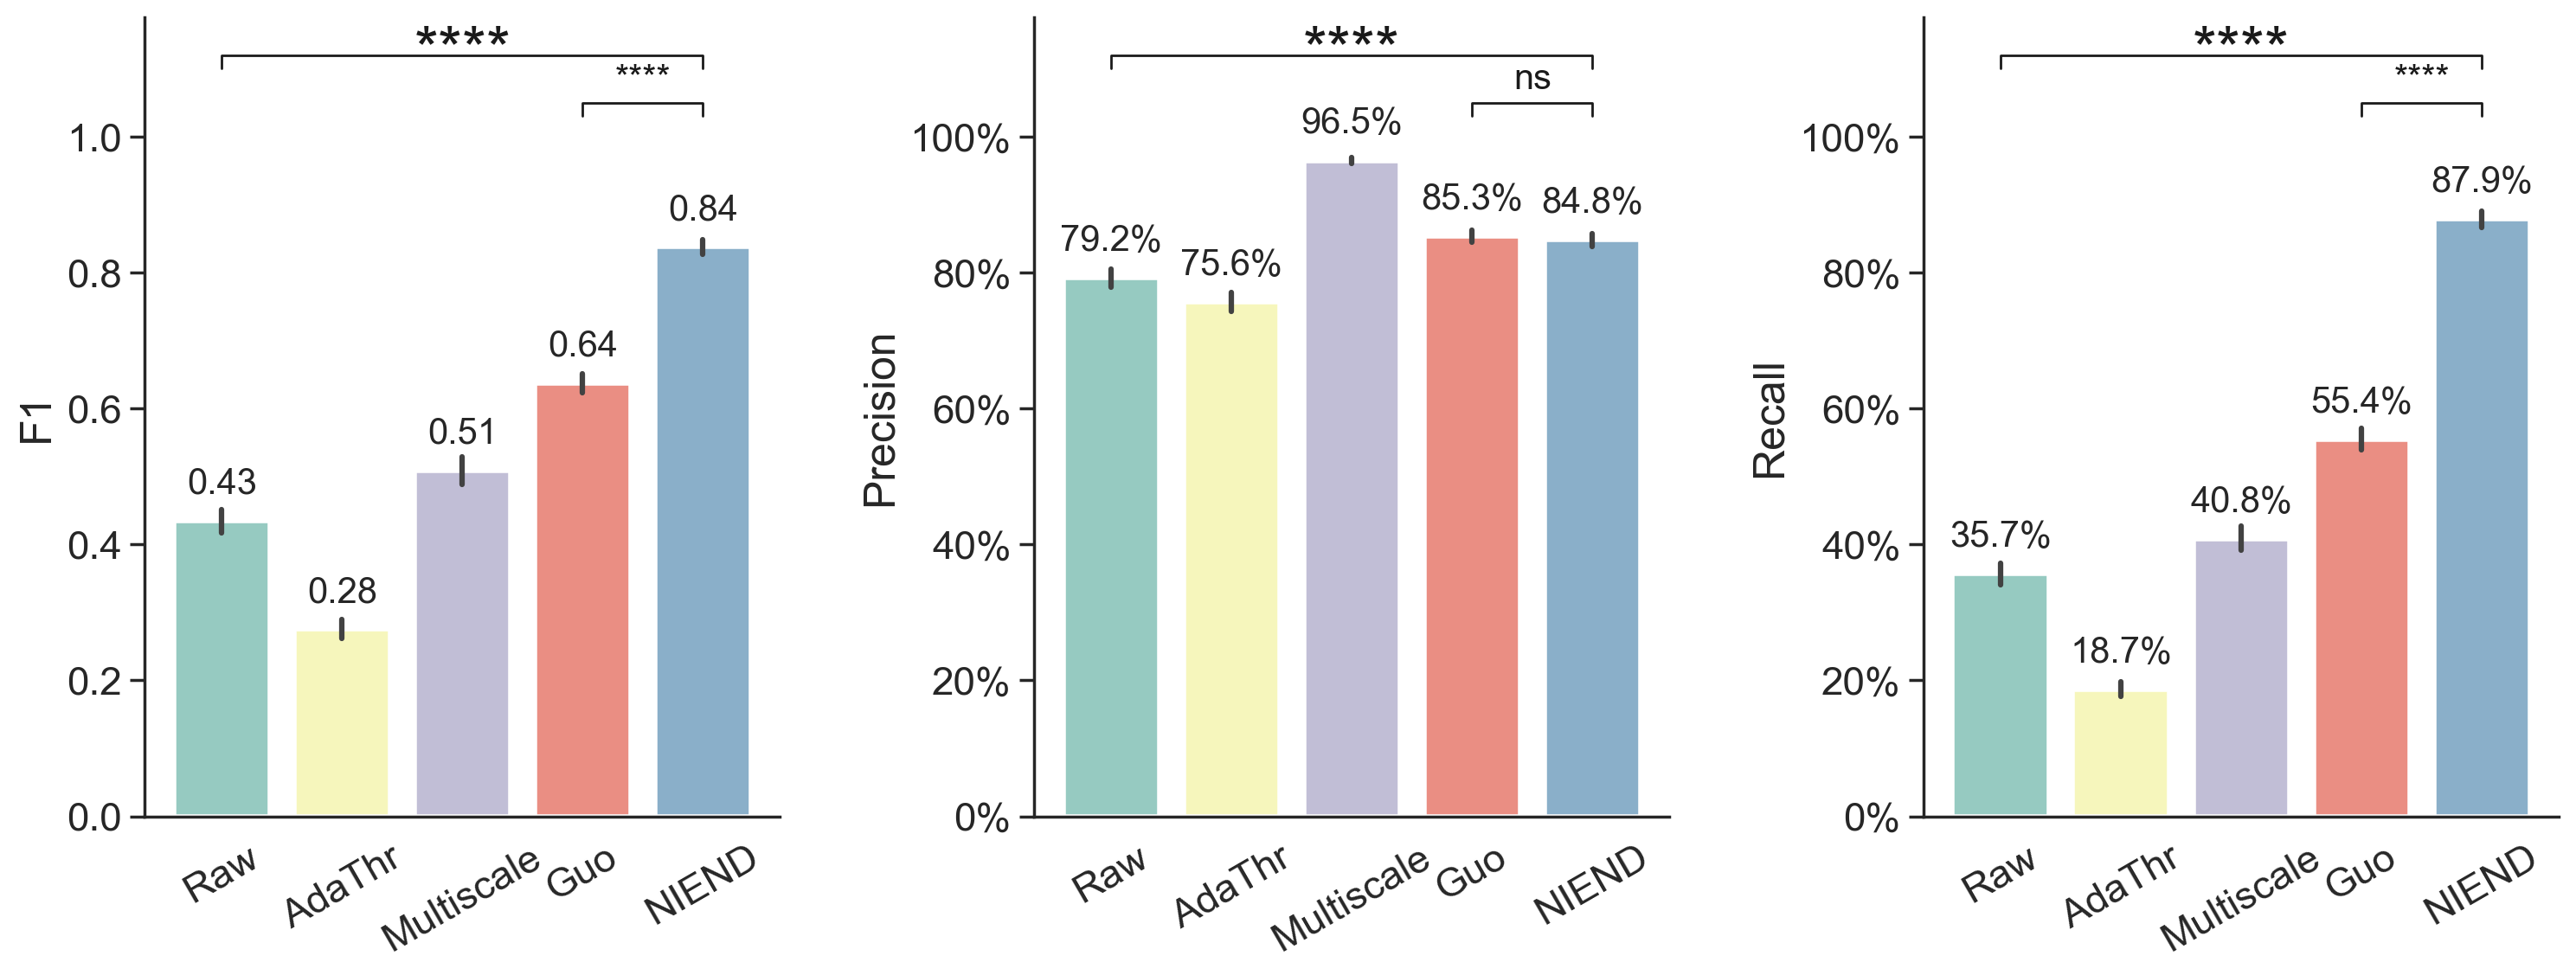

In [8]:
from scipy.stats import  ttest_ind

m = df.mean()

def test(ax, x1, x2, y, h, fs, a, b, shift=0):
    ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c="k")
    stat,p_value = ttest_ind(a, b)
    ax.text((x1+x2)*.5, y - h + shift, convert_pvalue_to_asterisks(p_value), ha='center', va='bottom', color="k", fontsize=fs)

# plot precision
sns.set(font_scale=1.5, style='white')
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 3, figsize=(18, 6), dpi=200)
plt.subplots_adjust(wspace=0.4)
sns.despine(fig, top=True, right=True)
ax = sns.barplot(data=df[['raw_precision', 'ada_precision', 'mul_precision', 'guo_precision', 'my_precision']], palette="Set3",
                   linewidth=2, ax=axs[1])
ax.set_xticks([*range(5)], ['Raw', 'AdaThr', 'Multiscale', 'Guo', 'NIEND'])
ax.set_ylabel('Precision')
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=0))
ax.tick_params(left=True, direction='out')
ax.tick_params(axis='x', rotation=30)
test(ax, 0, 4, 1.15 - .05, .02, 'x-large', df['raw_precision'], df['my_precision'])
test(ax, 3, 4, 1.15 - .12, .02, 'small', df['guo_precision'], df['my_precision'], .05)
ax.text(0, m['raw_precision']+.03, f"{m['raw_precision']*100:.1f}%", ha='center', va='bottom', fontsize=15)
ax.text(1, m['ada_precision']+.03, f"{m['ada_precision']*100:.1f}%", ha='center', va='bottom', fontsize=15)
ax.text(2, m['mul_precision']+.03, f"{m['mul_precision']*100:.1f}%", ha='center', va='bottom', fontsize=15)
ax.text(3, m['guo_precision']+.03, f"{m['guo_precision']*100:.1f}%", ha='center', va='bottom', fontsize=15)
ax.text(4, m['my_precision']+.03, f"{m['my_precision']*100:.1f}%", ha='center', va='bottom', fontsize=15)

ax = sns.barplot(data=df[['raw_recall', 'ada_recall', 'mul_recall', 'guo_recall', 'my_recall']], palette="Set3",
                 linewidth=2, ax=axs[2])
ax.set_xticks([*range(5)], ['Raw', 'AdaThr', 'Multiscale', 'Guo', 'NIEND'])
ax.set_ylabel('Recall')
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=0))
ax.tick_params(left=True, direction='out')
ax.tick_params(axis='x', rotation=30)
test(ax, 0, 4, 1.15 - .05, .02, 'x-large', df['raw_recall'], df['my_recall'])
test(ax, 3, 4, 1.15 - .12, .02, 'small', df['guo_recall'], df['my_recall'], .05)
ax.text(0, m['raw_recall']+.03, f"{m['raw_recall']*100:.1f}%", ha='center', va='bottom', fontsize=15)
ax.text(1, m['ada_recall']+.03, f"{m['ada_recall']*100:.1f}%", ha='center', va='bottom', fontsize=15)
ax.text(2, m['mul_recall']+.03, f"{m['mul_recall']*100:.1f}%", ha='center', va='bottom', fontsize=15)
ax.text(3, m['guo_recall']+.03, f"{m['guo_recall']*100:.1f}%", ha='center', va='bottom', fontsize=15)
ax.text(4, m['my_recall']+.03, f"{m['my_recall']*100:.1f}%", ha='center', va='bottom', fontsize=15)

ax = sns.barplot(data=df[['raw_f1', 'ada_f1', 'mul_f1', 'guo_f1', 'my_f1']], palette="Set3", linewidth=2, ax=axs[0])
ax.set_yticks([0., .2, .4, .6, .8, 1.])
ax.set_xticks([*range(5)], ['Raw', 'AdaThr', 'Multiscale', 'Guo', 'NIEND'])
ax.set_ylabel('F1')
ax.tick_params(left=True, direction='out')
ax.tick_params(axis='x', rotation=30)
test(ax, 0, 4, 1.15 - .05, .02, 'x-large', df['raw_f1'], df['my_f1'])
test(ax, 3, 4, 1.15 - .12, .02, 'small', df['guo_f1'], df['my_f1'], .05)
ax.text(0, m['raw_f1']+.03, f"{m['raw_f1']:.2f}", ha='center', va='bottom', fontsize=15)
ax.text(1, m['ada_f1']+.03, f"{m['ada_f1']:.2f}", ha='center', va='bottom', fontsize=15)
ax.text(2, m['mul_f1']+.03, f"{m['mul_f1']:.2f}", ha='center', va='bottom', fontsize=15)
ax.text(3, m['guo_f1']+.03, f"{m['guo_f1']:.2f}", ha='center', va='bottom', fontsize=15)
ax.text(4, m['my_f1']+.03, f"{m['my_f1']:.2f}", ha='center', va='bottom', fontsize=15)

# Benchmark by NeuroGPSTree

In [9]:
import pandas as pd
import numpy as np
from matplotlib import ticker
import seaborn as sns
df = pd.read_csv(r"D:\rectify\eval_gps.csv", index_col=0)
df['raw_f1'] = 2 * (df['raw_precision'] * df['raw_recall']) / (df['raw_precision'] + df['raw_recall'] + .00001)
df['guo_f1'] = 2 * (df['guo_precision'] * df['guo_recall']) / (df['guo_precision'] + df['guo_recall'] + .00001)
df['mul_f1'] = 2 * (df['mul_precision'] * df['mul_recall']) / (df['mul_precision'] + df['mul_recall'] + .00001)
df['ada_f1'] = 2 * (df['ada_precision'] * df['ada_recall']) / (df['ada_precision'] + df['ada_recall'] + .00001)
df['my_f1'] = 2 * (df['my_precision'] * df['my_recall']) / (df['my_precision'] + df['my_recall'] + .00001)

def convert_pvalue_to_asterisks(pvalue):
    if pvalue <= 0.0001:
        return "****"
    elif pvalue <= 0.001:
        return "***"
    elif pvalue <= 0.01:
        return "**"
    elif pvalue <= 0.05:
        return "*"
    return "ns"

df.mean()

raw_recall       0.781722
my_recall        0.932176
guo_recall       0.874095
ada_recall       0.620164
mul_recall       0.550574
raw_precision    0.842675
my_precision     0.833748
guo_precision    0.833015
ada_precision    0.947866
mul_precision    0.947700
raw_f1           0.776613
guo_f1           0.826405
mul_f1           0.659736
ada_f1           0.718723
my_f1            0.864716
dtype: float64

Text(4, 0.894715888836017, '0.86')

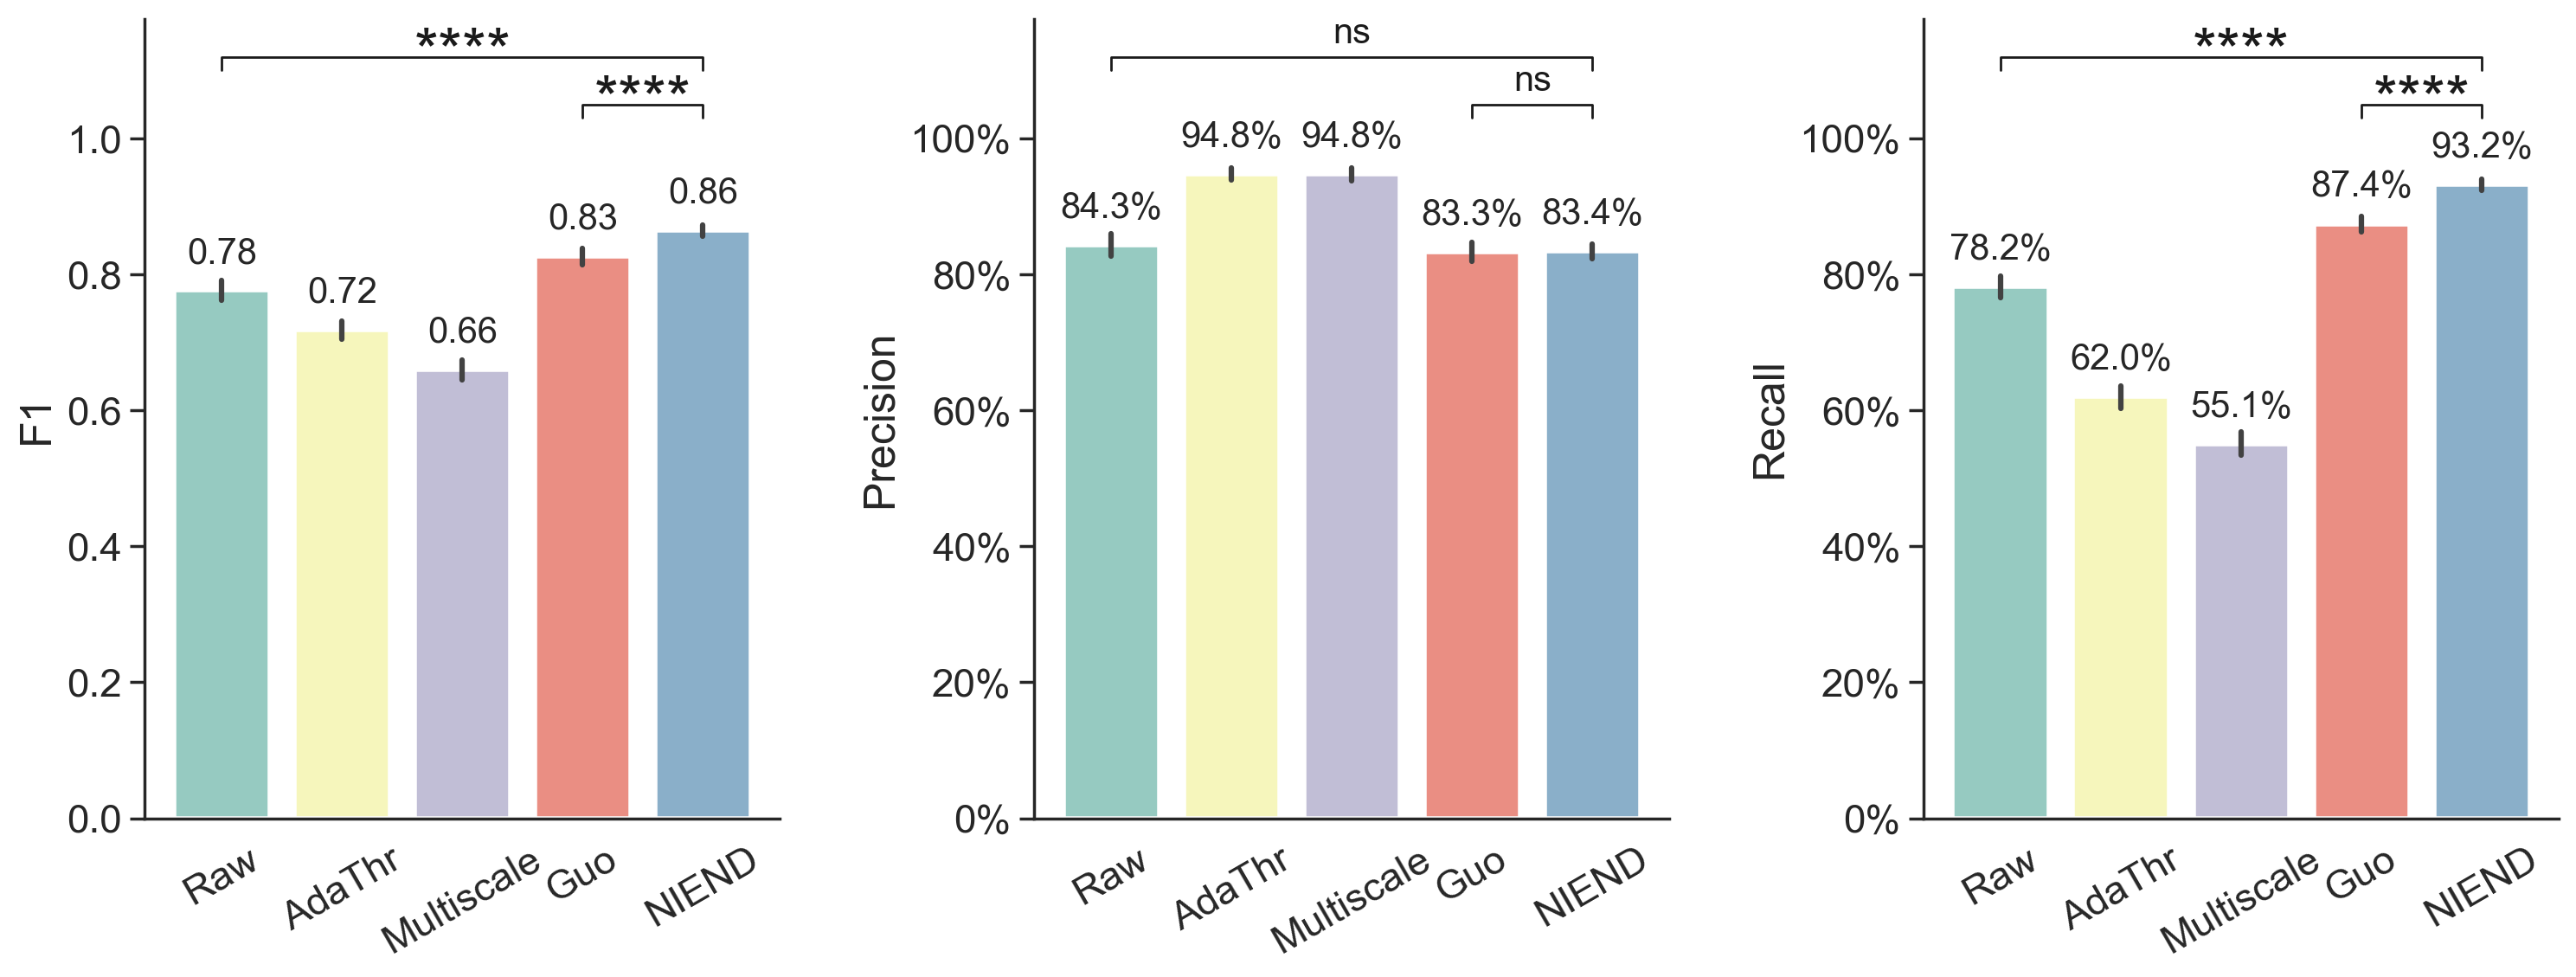

In [10]:
from scipy.stats import  ttest_ind

m = df.mean()

def test(ax, x1, x2, y, h, fs, a, b, shift=0):
    ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c="k")
    stat,p_value = ttest_ind(a, b)
    ax.text((x1+x2)*.5, y - h + shift, convert_pvalue_to_asterisks(p_value), ha='center', va='bottom', color="k", fontsize=fs)

# plot precision
sns.set(font_scale=1.5, style='white')
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 3, figsize=(18, 6), dpi=200)
plt.subplots_adjust(wspace=0.4)
sns.despine(fig, top=True, right=True)
ax = sns.barplot(data=df[['raw_precision', 'ada_precision', 'mul_precision', 'guo_precision', 'my_precision']], palette="Set3",
                   linewidth=2, ax=axs[1])
ax.set_xticks([*range(5)], ['Raw', 'AdaThr', 'Multiscale', 'Guo', 'NIEND'])
ax.set_ylabel('Precision')
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=0))
ax.tick_params(left=True, direction='out')
ax.tick_params(axis='x', rotation=30)
test(ax, 0, 4, 1.15 - .05, .02, 'small', df['raw_precision'], df['my_precision'], .05)
test(ax, 3, 4, 1.15 - .12, .02, 'small', df['guo_precision'], df['my_precision'], .05)
ax.text(0, m['raw_precision']+.03, f"{m['raw_precision']*100:.1f}%", ha='center', va='bottom', fontsize=15)
ax.text(1, m['ada_precision']+.03, f"{m['ada_precision']*100:.1f}%", ha='center', va='bottom', fontsize=15)
ax.text(2, m['mul_precision']+.03, f"{m['mul_precision']*100:.1f}%", ha='center', va='bottom', fontsize=15)
ax.text(3, m['guo_precision']+.03, f"{m['guo_precision']*100:.1f}%", ha='center', va='bottom', fontsize=15)
ax.text(4, m['my_precision']+.03, f"{m['my_precision']*100:.1f}%", ha='center', va='bottom', fontsize=15)

ax = sns.barplot(data=df[['raw_recall', 'ada_recall', 'mul_recall', 'guo_recall', 'my_recall']], palette="Set3",
                 linewidth=2, ax=axs[2])
ax.set_xticks([*range(5)], ['Raw', 'AdaThr', 'Multiscale', 'Guo', 'NIEND'])
ax.set_ylabel('Recall')
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=0))
ax.tick_params(left=True, direction='out')
ax.tick_params(axis='x', rotation=30)
test(ax, 0, 4, 1.15 - .05, .02, 'x-large', df['raw_recall'], df['my_recall'])
test(ax, 3, 4, 1.15 - .12, .02, 'x-large', df['guo_recall'], df['my_recall'])
ax.text(0, m['raw_recall']+.03, f"{m['raw_recall']*100:.1f}%", ha='center', va='bottom', fontsize=15)
ax.text(1, m['ada_recall']+.03, f"{m['ada_recall']*100:.1f}%", ha='center', va='bottom', fontsize=15)
ax.text(2, m['mul_recall']+.03, f"{m['mul_recall']*100:.1f}%", ha='center', va='bottom', fontsize=15)
ax.text(3, m['guo_recall']+.03, f"{m['guo_recall']*100:.1f}%", ha='center', va='bottom', fontsize=15)
ax.text(4, m['my_recall']+.03, f"{m['my_recall']*100:.1f}%", ha='center', va='bottom', fontsize=15)

ax = sns.barplot(data=df[['raw_f1', 'ada_f1', 'mul_f1', 'guo_f1', 'my_f1']], palette="Set3", linewidth=2, ax=axs[0])
ax.set_yticks([0., .2, .4, .6, .8, 1.])
ax.set_xticks([*range(5)], ['Raw', 'AdaThr', 'Multiscale', 'Guo', 'NIEND'])
ax.set_ylabel('F1')
ax.tick_params(left=True, direction='out')
ax.tick_params(axis='x', rotation=30)
test(ax, 0, 4, 1.15 - .05, .02, 'x-large', df['raw_f1'], df['my_f1'])
test(ax, 3, 4, 1.15 - .12, .02, 'x-large', df['guo_f1'], df['my_f1'])
ax.text(0, m['raw_f1']+.03, f"{m['raw_f1']:.2f}", ha='center', va='bottom', fontsize=15)
ax.text(1, m['ada_f1']+.03, f"{m['ada_f1']:.2f}", ha='center', va='bottom', fontsize=15)
ax.text(2, m['mul_f1']+.03, f"{m['mul_f1']:.2f}", ha='center', va='bottom', fontsize=15)
ax.text(3, m['guo_f1']+.03, f"{m['guo_f1']:.2f}", ha='center', va='bottom', fontsize=15)
ax.text(4, m['my_f1']+.03, f"{m['my_f1']:.2f}", ha='center', va='bottom', fontsize=15)

# Ultratracer plot

C:\Users\zzh\AppData\Local\Temp\ipykernel_6760\1838557230.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('gray')


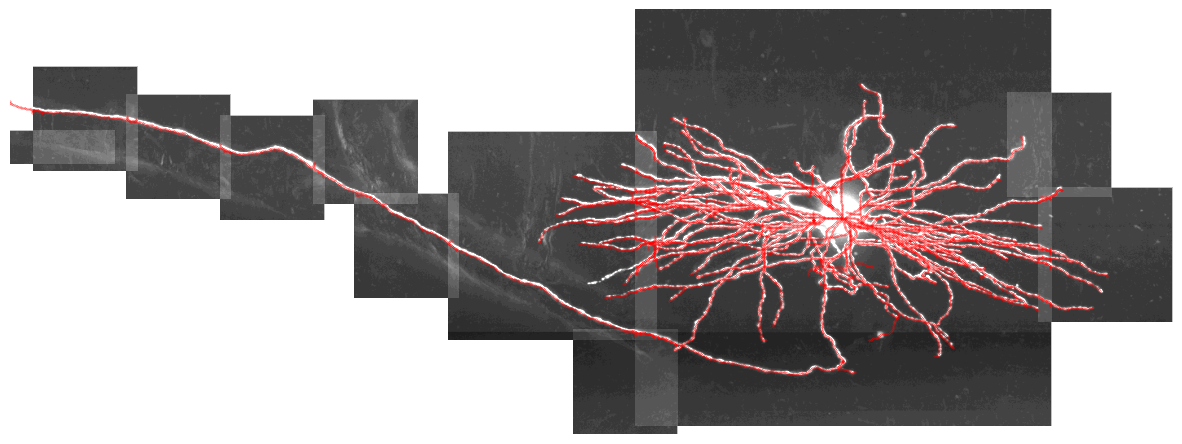

In [311]:
from v3dpy.loaders import Raw
from pathlib import Path
from utils import swc_handler
import matplotlib.colors as mcolors
import matplotlib.patches as patches

wkdir = Path('d:/rectify') / 'tera_recon'


def norm(img):
    img_min = max(img.mean() - img.std() * 3, 0)
    img_max = min(img.mean() + img.std() * 3, img.max())
    img = (img - img_min) / (img_max - img_min) * 255
    return img


def ut_plot(ut_folder: Path, swc: Path, raw: Path):
    tree = swc_handler.parse_swc(swc)
    fig, ax = plt.subplots(figsize=(15, 15))
    cmap = plt.cm.get_cmap('gray')
    cmap = cmap(np.arange(256))
    cmap[:,-1] = np.linspace(0, 1, 256)
    cmap = mcolors.ListedColormap(cmap)
    img_raw = Raw().load(raw)[0].max(axis=0)
    img_raw = norm(img_raw).T
    
    for img_path in ut_folder.glob('*.v3draw'):
        x, y = img_path.stem.split('_')[1:4:2]
        x = int(x)
        y = int(y)
        t = x
        x = y
        y = t
        img = Raw().load(img_path)[0].max(axis=0)
        rect = patches.Rectangle((x, y), img.shape[1], img.shape[0], linewidth=2, edgecolor='none', facecolor='black', linestyle='--')
        ax.add_patch(rect)
        h, w = img.shape
        
        plt.imshow(np.flip(img_raw[y:y+h, x:x+w], axis=0), extent=(x, x + w, y, y + h), cmap=cmap, vmin=0, vmax=255, zorder=100)


    tree = np.transpose([i[2:4] for i in tree])
    plt.scatter(tree[1], tree[0], s=.03, c=['#ff0000'], zorder=1000)
    plt.xticks([])
    plt.yticks([])
    sns.despine(fig, bottom=True, left=True)

    
ut_plot(wkdir / 'sample6' / '17302_15030_27059_4032_ut.marker_tmp_APP2', wkdir / 'sample6' / '17302_15030_27059_4032_ut.marker_nc_APP2_GD.swc', 
        wkdir / '17302_15030_27059_4032_raw.v3draw')

([], [])

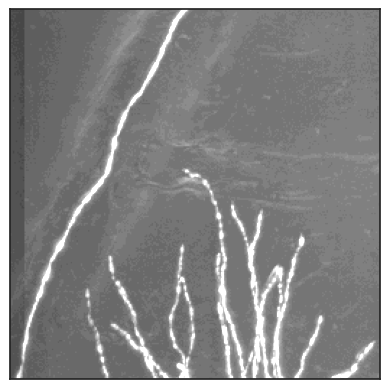

In [314]:
sub = wkdir / 'sample6' / '17302_15030_27059_4032_ut.marker_tmp_APP2' / 'x_873_y_538_z_57.v3draw'
# tree = swc_handler.parse_swc(sub.with_suffix('.swc'))

img = Raw().load(sub)[0].max(axis=0)
img2 = Raw().load(wkdir / '17302_15030_27059_4032_raw.v3draw')[0].max(axis=0)
x, y = sub.stem.split('_')[1:4:2]
x = int(x)
y = int(y)
# plt.imshow(img, cmap='gray', vmin=0, vmax=255)
h, w = img.shape
plt.imshow(norm(img2[y:y+h, x:x+w]), cmap='gray', vmin=0, vmax=255)
# tree = np.transpose([i[2:4] for i in tree])
# plt.scatter(tree[0], tree[1], s=.5, c=['#ff0000'])
plt.xticks([])
plt.yticks([])

# plot topo analysis

In [14]:
import pickle
from pathlib import Path
wkdir = Path('d:/rectify')
with open(wkdir / 'topo_eval.pickle', 'rb') as f:
    topo_eval = pickle.load(f)

In [15]:
import itertools
import pandas as pd

def rat(a, b):
    return b / max(a + b, 1)

fusion = {}
fusion['niend'] = [t['niend']['fusion'] for t in topo_eval if t is not None]
fusion['raw'] = [t['raw']['fusion'] for t in topo_eval if t is not None]
fusion['guo'] = [t['guo']['fusion'] for t in topo_eval if t is not None]
fusion['ada'] = [t['ada']['fusion'] for t in topo_eval if t is not None]
fusion['multi'] = [t['multi']['fusion'] for t in topo_eval if t is not None]

breaks = {}
breaks['niend'] = [t['niend']['breaks'] for t in topo_eval if t is not None]
breaks['raw'] = [t['raw']['breaks'] for t in topo_eval if t is not None]
breaks['guo'] = [t['guo']['breaks'] for t in topo_eval if t is not None]
breaks['ada'] = [t['ada']['breaks'] for t in topo_eval if t is not None]
breaks['multi'] = [t['multi']['breaks'] for t in topo_eval if t is not None]

reverse = {}
reverse['niend'] = [rat(*t['niend']['reverse']) for t in topo_eval if t is not None]
reverse['raw'] = [rat(*t['raw']['reverse']) for t in topo_eval if t is not None]
reverse['guo'] = [rat(*t['guo']['reverse']) for t in topo_eval if t is not None]
reverse['ada'] = [rat(*t['ada']['reverse']) for t in topo_eval if t is not None]
reverse['multi'] = [rat(*t['multi']['reverse']) for t in topo_eval if t is not None]

pd_bo = {}
pd_bo['niend'] = [*itertools.chain.from_iterable(t['niend']['pdsholl'] for t in topo_eval if t is not None)]
pd_bo['raw'] = [*itertools.chain.from_iterable(t['raw']['pdsholl'] for t in topo_eval if t is not None)]
pd_bo['guo'] = [*itertools.chain.from_iterable(t['guo']['pdsholl'] for t in topo_eval if t is not None)]
pd_bo['ada'] = [*itertools.chain.from_iterable(t['ada']['pdsholl'] for t in topo_eval if t is not None)]
pd_bo['multi'] = [*itertools.chain.from_iterable(t['multi']['pdsholl'] for t in topo_eval if t is not None)]
pd_bo['manual'] = [*itertools.chain.from_iterable(t['gs_pdsholl'] for t in topo_eval if t is not None)]
pd_bo_df = [pd.DataFrame(v, columns=['branch order', 'path distance']) for v in pd_bo.values()]
pd_bo_df[0]['method'] = 'NIEND'
pd_bo_df[1]['method'] = 'Raw'
pd_bo_df[2]['method'] = 'Guo'
pd_bo_df[3]['method'] = 'AdaThr'
pd_bo_df[4]['method'] = 'Multiscale'
pd_bo_df[5]['method'] = 'Manual'
pd_bo_df = pd.concat(pd_bo_df, axis=0)

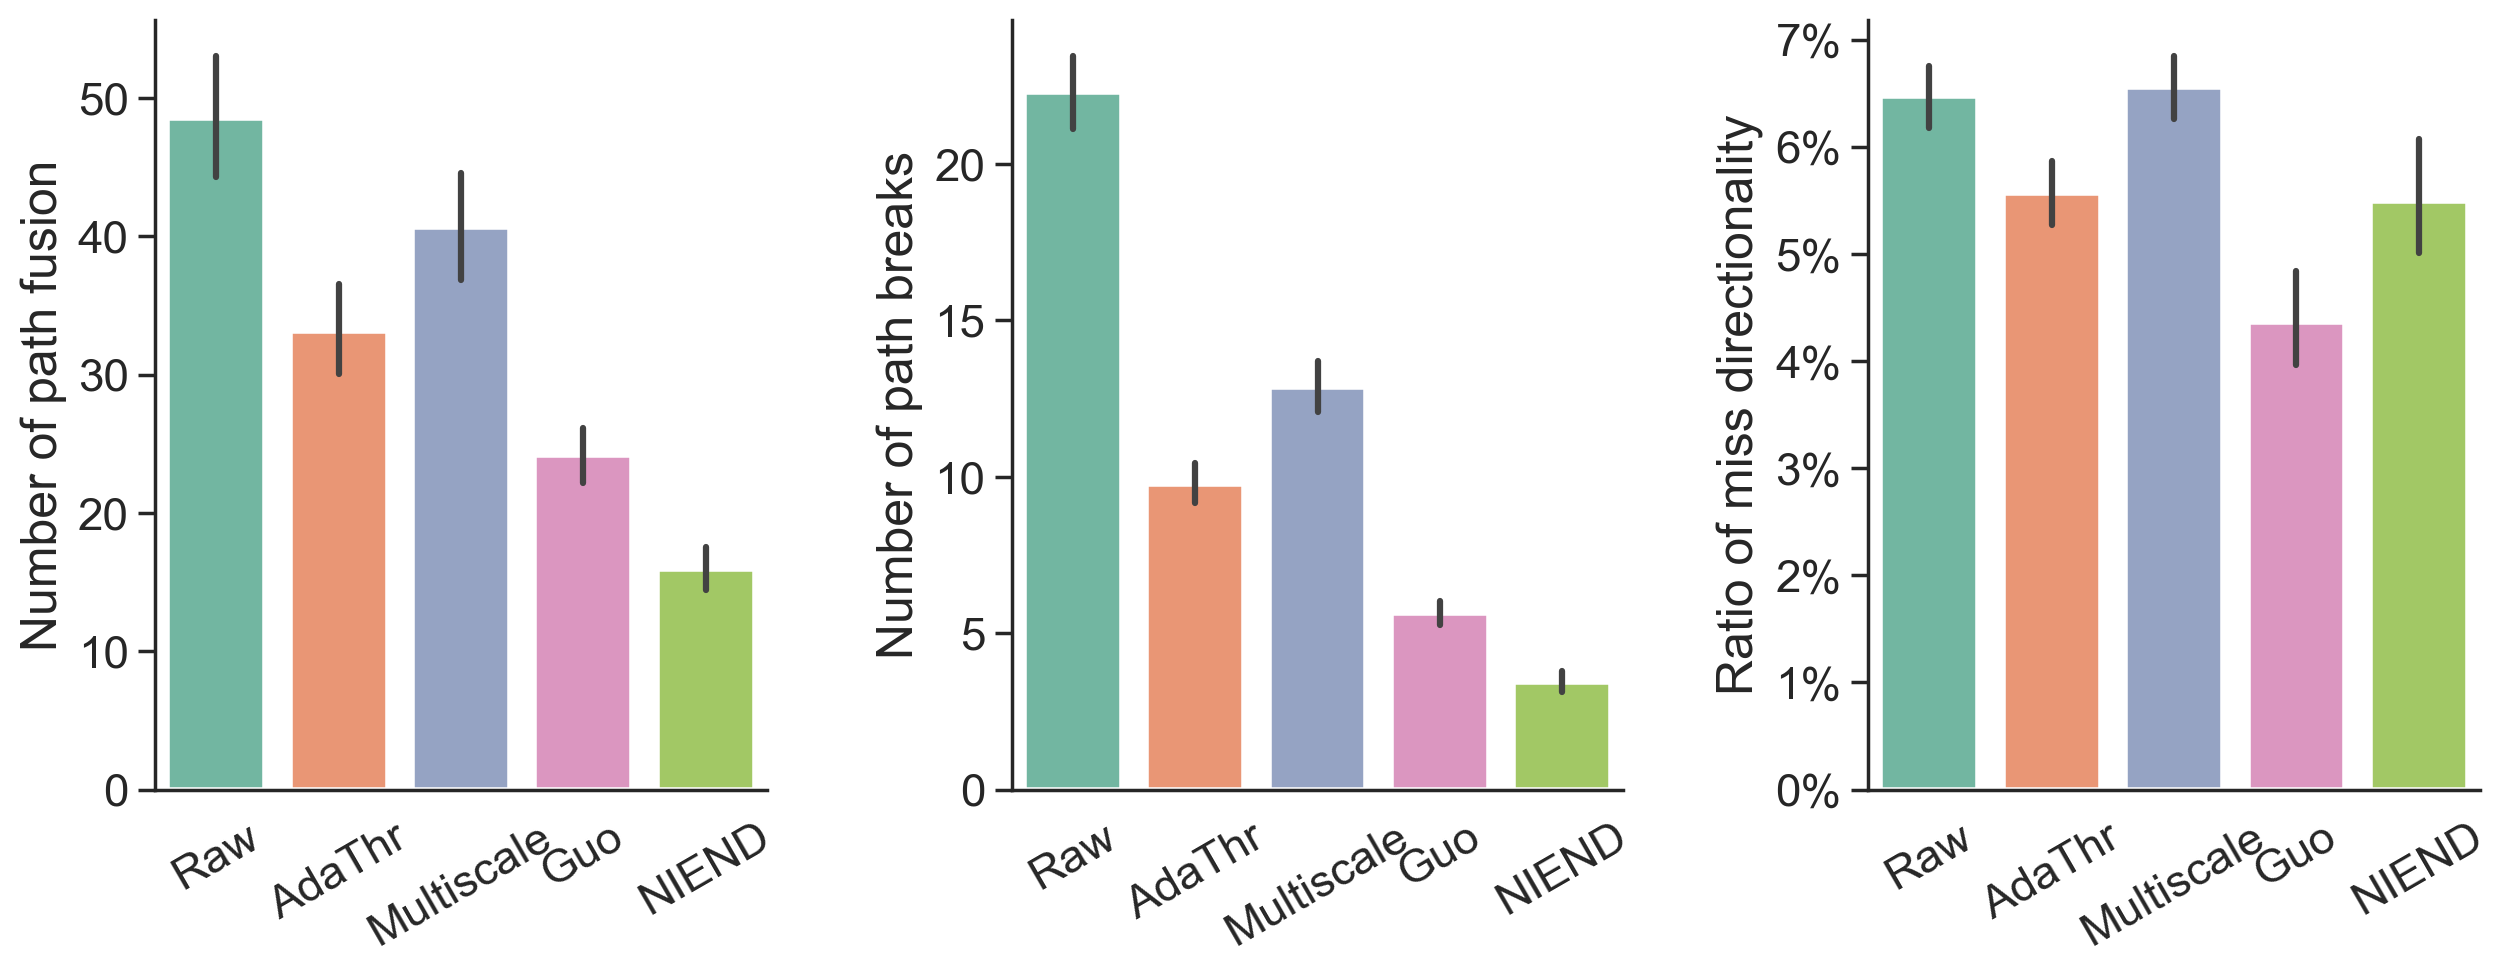

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import ticker

fig, axs = plt.subplots(1, 3, figsize=(15, 5), dpi=200)
fig.subplots_adjust(wspace=0.4)
sns.despine(top=True, right=True)
sns.set(font_scale=1.5, style='white')

ax = sns.barplot(data=fusion, palette="Set2",linewidth=2, ax=axs[0])
ax.set_xticks([*range(5)], ['Raw', 'AdaThr', 'Multiscale', 'Guo', 'NIEND'])
ax.set_ylabel(f'Number of path fusion')
ax.tick_params(left=True, direction='out')
ax.tick_params(axis='x', rotation=30)


ax = sns.barplot(data=breaks, palette="Set2",linewidth=2, ax=axs[1])
ax.set_xticks([*range(5)], ['Raw', 'AdaThr', 'Multiscale', 'Guo', 'NIEND'])
ax.set_ylabel(f'Number of path breaks')
ax.tick_params(left=True, direction='out')
ax.tick_params(axis='x', rotation=30)


ax = sns.barplot(data=reverse, palette="Set2",linewidth=2, ax=axs[2])
ax.set_xticks([*range(5)], ['Raw', 'AdaThr', 'Multiscale', 'Guo', 'NIEND'])
ax.set_ylabel(f'Ratio of miss directionality')
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=0))
ax.tick_params(left=True, direction='out')
ax.tick_params(axis='x', rotation=30)

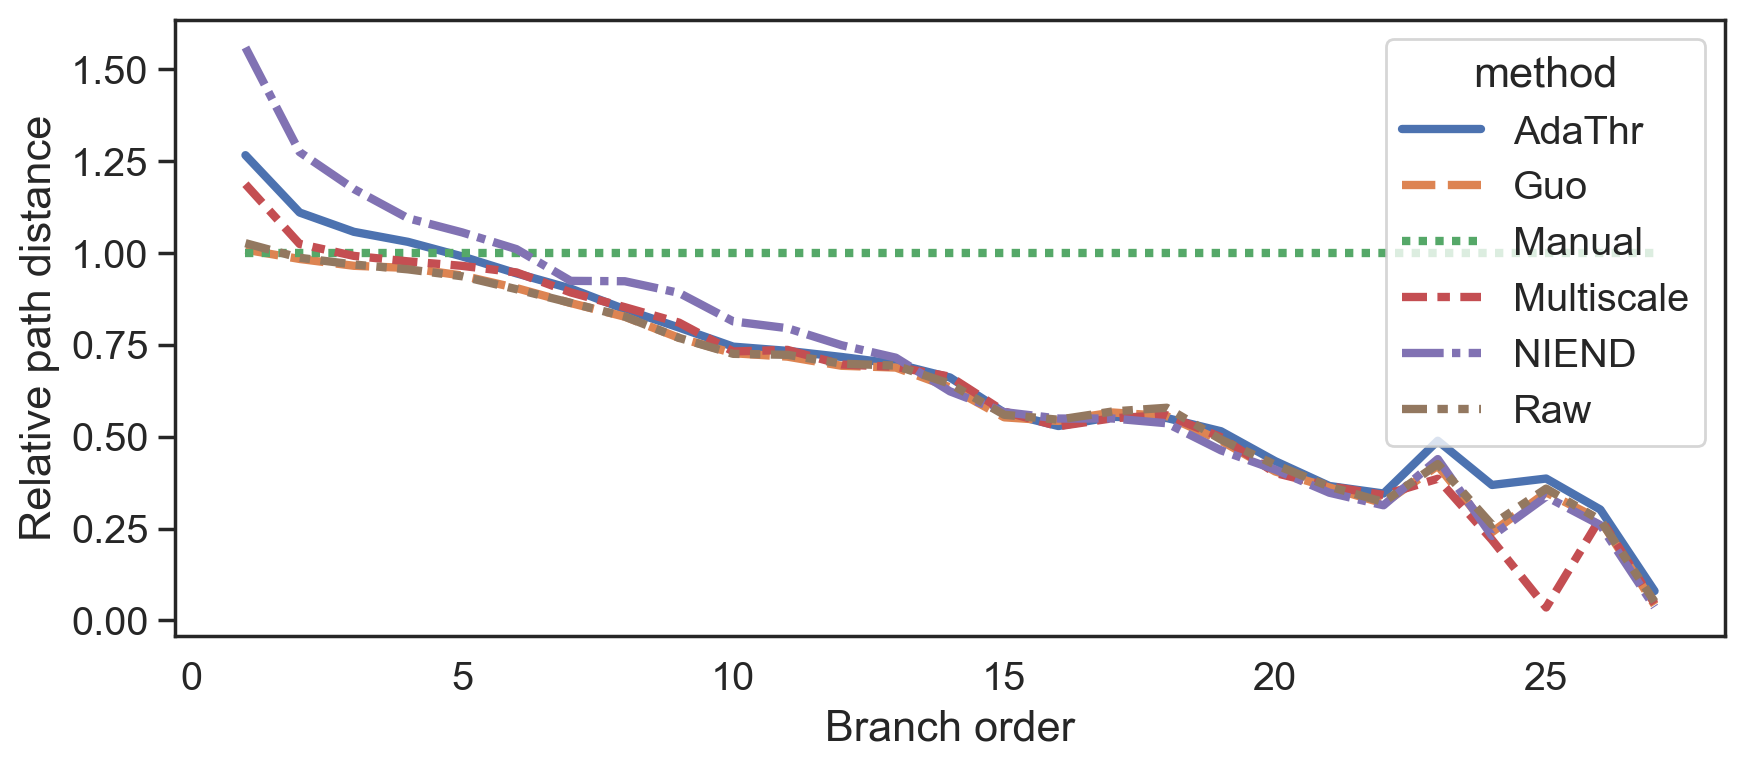

In [17]:
pd_bo_df_agg = pd.pivot_table(pd_bo_df, columns='method', aggfunc='mean', values='path distance', index='branch order')
pd_bo_df_agg['NIEND'] /= pd_bo_df_agg['Manual']
pd_bo_df_agg['Guo'] /= pd_bo_df_agg['Manual']
pd_bo_df_agg['AdaThr'] /= pd_bo_df_agg['Manual']
pd_bo_df_agg['Multiscale'] /= pd_bo_df_agg['Manual']
pd_bo_df_agg['Raw'] /= pd_bo_df_agg['Manual']
pd_bo_df_agg['Manual'] /= pd_bo_df_agg['Manual']

fig = plt.figure(figsize=(10, 4), dpi=200)
sns.set(font_scale=1.3, style='white')
ax = sns.lineplot(data=pd_bo_df_agg, linewidth=3)
ax.set_ylabel('Relative path distance')
ax.set_xlabel('Branch order')
ax.tick_params(left=True, direction='out')
# ax.set_xticks([*range(0, 30, 2)])
# ax.set_xlim(-.5, 30)

# psf test

In [19]:
import pandas as pd
import numpy as np
from matplotlib import ticker
import seaborn as sns
df = pd.read_csv(r"D:\rectify\eval_psf.csv", index_col=0)
df['raw_f1'] = 2 * (df['raw_precision'] * df['raw_recall']) / (df['raw_precision'] + df['raw_recall'] + .00001)
df['psf_f1'] = 2 * (df['psf_precision'] * df['psf_recall']) / (df['psf_precision'] + df['psf_recall'] + .00001)
df['my_f1'] = 2 * (df['my_precision'] * df['my_recall']) / (df['my_precision'] + df['my_recall'] + .00001)

def convert_pvalue_to_asterisks(pvalue):
    if pvalue <= 0.0001:
        return "****"
    elif pvalue <= 0.001:
        return "***"
    elif pvalue <= 0.01:
        return "**"
    elif pvalue <= 0.05:
        return "*"
    return "ns"

df.mean()

raw_recall       0.795265
raw_precision    0.862581
psf_recall       0.771573
psf_precision    0.627162
my_recall        0.908440
my_precision     0.883282
raw_f1           0.781998
psf_f1           0.525931
my_f1            0.879231
dtype: float64

Text(2, 0.9092309773489393, '0.88')

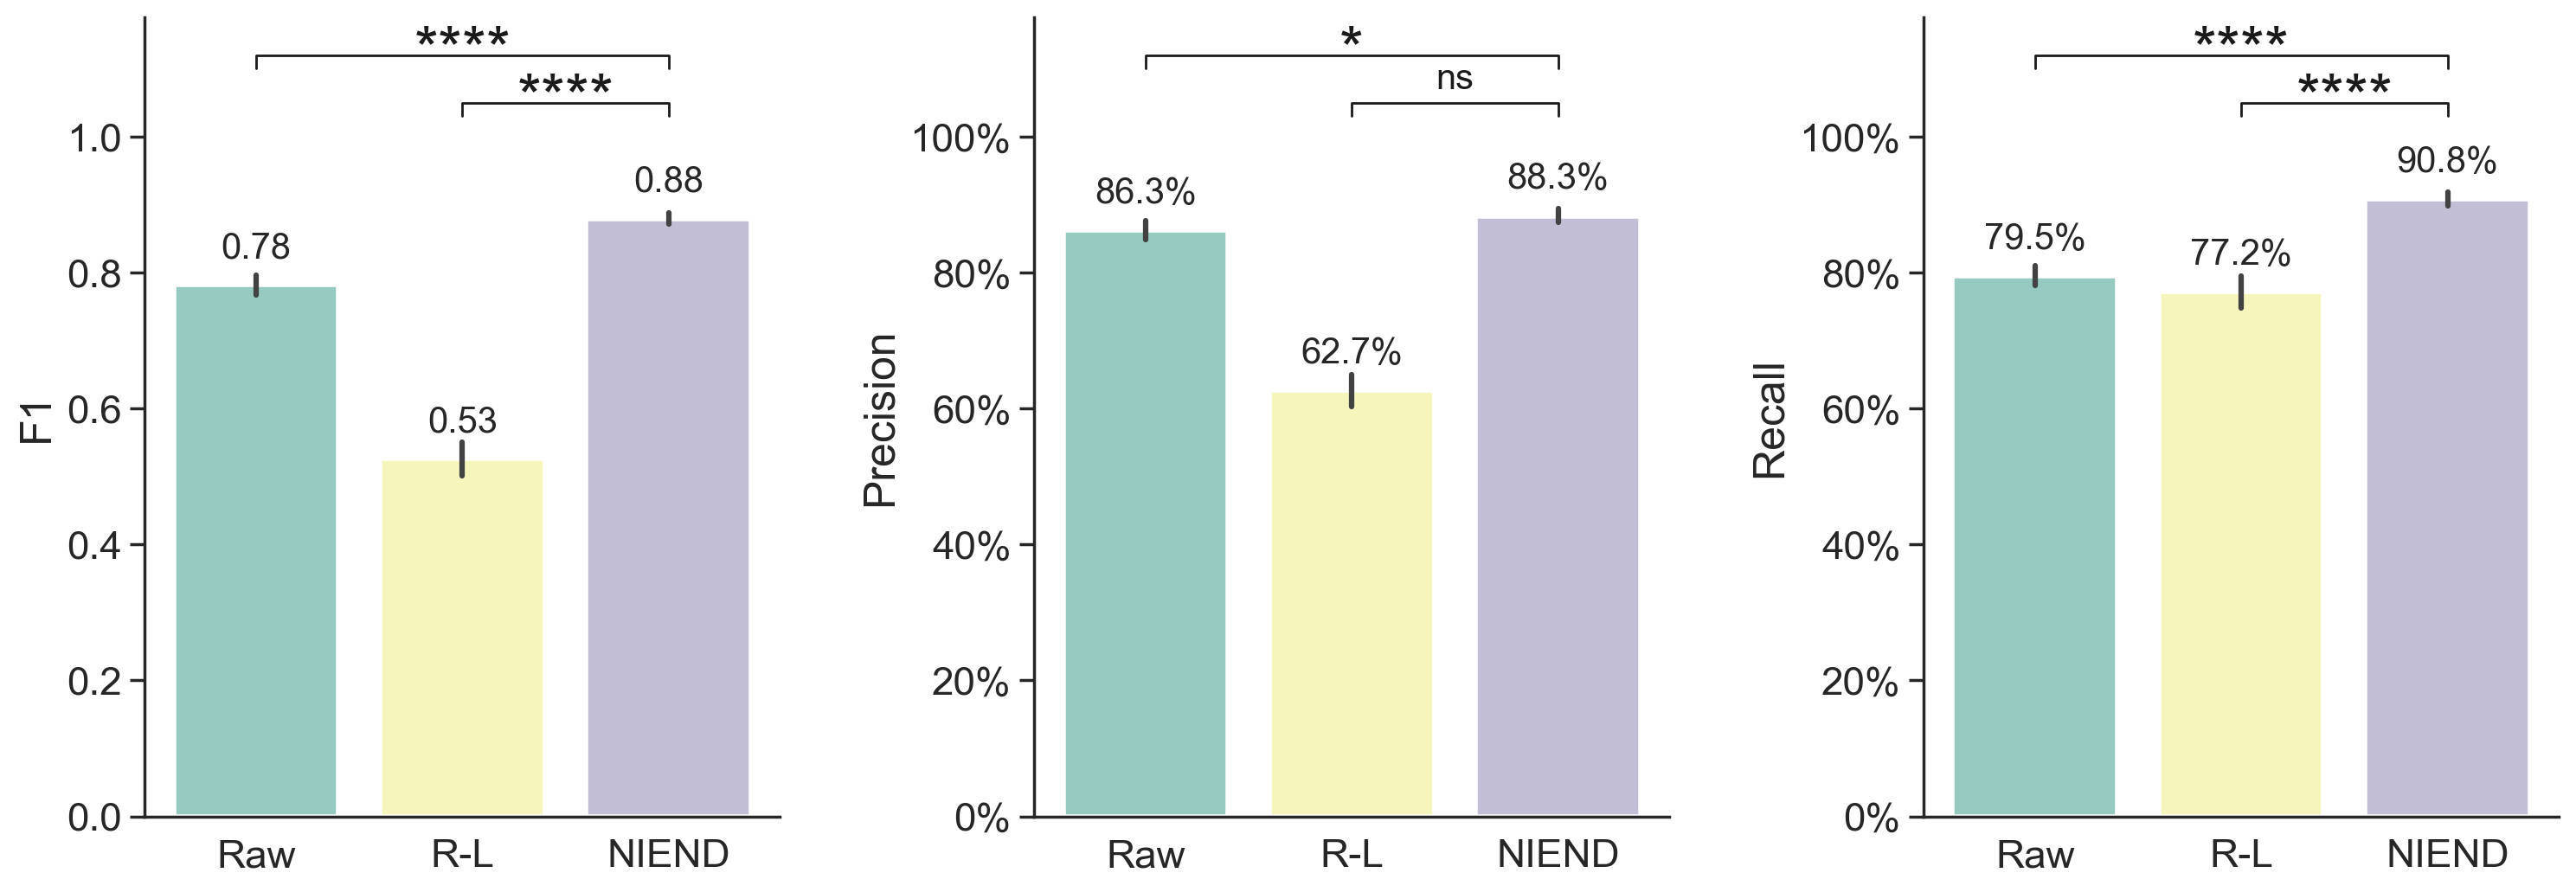

In [25]:
from scipy.stats import  ttest_ind

m = df.mean()

def test(ax, x1, x2, y, h, fs, a, b, shift=0):
    ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1, c="k")
    stat,p_value = ttest_ind(a, b)
    ax.text((x1+x2)*.5, y - h + shift, convert_pvalue_to_asterisks(p_value), ha='center', va='bottom', color="k", fontsize=fs)

# plot precision
sns.set(font_scale=1.5, style='white')
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 3, figsize=(18, 6), dpi=200)
plt.subplots_adjust(wspace=0.4)
sns.despine(fig, top=True, right=True)
ax = sns.barplot(data=df[['raw_precision', 'psf_precision', 'my_precision']], palette="Set3", linewidth=2, ax=axs[1])
ax.set_xticks([*range(3)], ['Raw', 'R-L', 'NIEND'])
ax.set_ylabel('Precision')
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=0))
ax.tick_params(left=True, direction='out')
# ax.tick_params(axis='x', rotation=30)
test(ax, 0, 2, 1.15 - .05, .02, 'x-large', df['raw_precision'], df['my_precision'])
test(ax, 1, 2, 1.15 - .12, .02, 'small', df['psf_precision'], df['psf_precision'], .05)
ax.text(0, m['raw_precision']+.03, f"{m['raw_precision']*100:.1f}%", ha='center', va='bottom', fontsize=15)
ax.text(1, m['psf_precision']+.03, f"{m['psf_precision']*100:.1f}%", ha='center', va='bottom', fontsize=15)
ax.text(2, m['my_precision']+.03, f"{m['my_precision']*100:.1f}%", ha='center', va='bottom', fontsize=15)

ax = sns.barplot(data=df[['raw_recall', 'psf_recall', 'my_recall']], palette="Set3", linewidth=2, ax=axs[2])
ax.set_xticks([*range(3)], ['Raw', 'R-L', 'NIEND'])
ax.set_ylabel('Recall')
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=0))
ax.tick_params(left=True, direction='out')
# ax.tick_params(axis='x', rotation=30)
test(ax, 0, 2, 1.15 - .05, .02, 'x-large', df['raw_recall'], df['my_recall'])
test(ax, 1, 2, 1.15 - .12, .02, 'x-large', df['psf_recall'], df['my_recall'])
ax.text(0, m['raw_recall']+.03, f"{m['raw_recall']*100:.1f}%", ha='center', va='bottom', fontsize=15)
ax.text(1, m['psf_recall']+.03, f"{m['psf_recall']*100:.1f}%", ha='center', va='bottom', fontsize=15)
ax.text(2, m['my_recall']+.03, f"{m['my_recall']*100:.1f}%", ha='center', va='bottom', fontsize=15)

ax = sns.barplot(data=df[['raw_f1', 'psf_f1', 'my_f1']], palette="Set3", linewidth=2, ax=axs[0])
ax.set_yticks([0., .2, .4, .6, .8, 1.])
ax.set_xticks([*range(3)], ['Raw', 'R-L', 'NIEND'])
ax.set_ylabel('F1')
ax.tick_params(left=True, direction='out')
# ax.tick_params(axis='x', rotation=30)
test(ax, 0, 2, 1.15 - .05, .02, 'x-large', df['raw_f1'], df['my_f1'])
test(ax, 1, 2, 1.15 - .12, .02, 'x-large', df['psf_f1'], df['my_f1'])
ax.text(0, m['raw_f1']+.03, f"{m['raw_f1']:.2f}", ha='center', va='bottom', fontsize=15)
ax.text(1, m['psf_f1']+.03, f"{m['psf_f1']:.2f}", ha='center', va='bottom', fontsize=15)
ax.text(2, m['my_f1']+.03, f"{m['my_f1']:.2f}", ha='center', va='bottom', fontsize=15)

image quality

In [1]:
import pickle
from pathlib import Path
import seaborn as sns
import numpy as np
wkdir = Path('D:/rectify')
with open(wkdir / 'psf_masking_guo_metric.pickle', 'rb') as f:
    raw, psf, my, names = pickle.load(f)
sns.set(font_scale=1.2, style='ticks')
raw = np.transpose(raw)
psf = np.transpose(psf)
my = np.transpose(my)
import pandas as pd
df = pd.concat([
    pd.DataFrame({'sbc': raw[0], 'ent': raw[1], 'uni': raw[2], 'rsd': raw[3], 'cond': 'Raw' }),
    pd.DataFrame({'sbc': psf[0], 'ent': psf[1], 'uni': psf[2], 'rsd': psf[3], 'cond': 'R-L'}),
    pd.DataFrame({'sbc': my[0], 'ent': my[1], 'uni': my[2], 'rsd': my[3], 'cond': 'NIEND'}),
])
import matplotlib.pyplot as plt

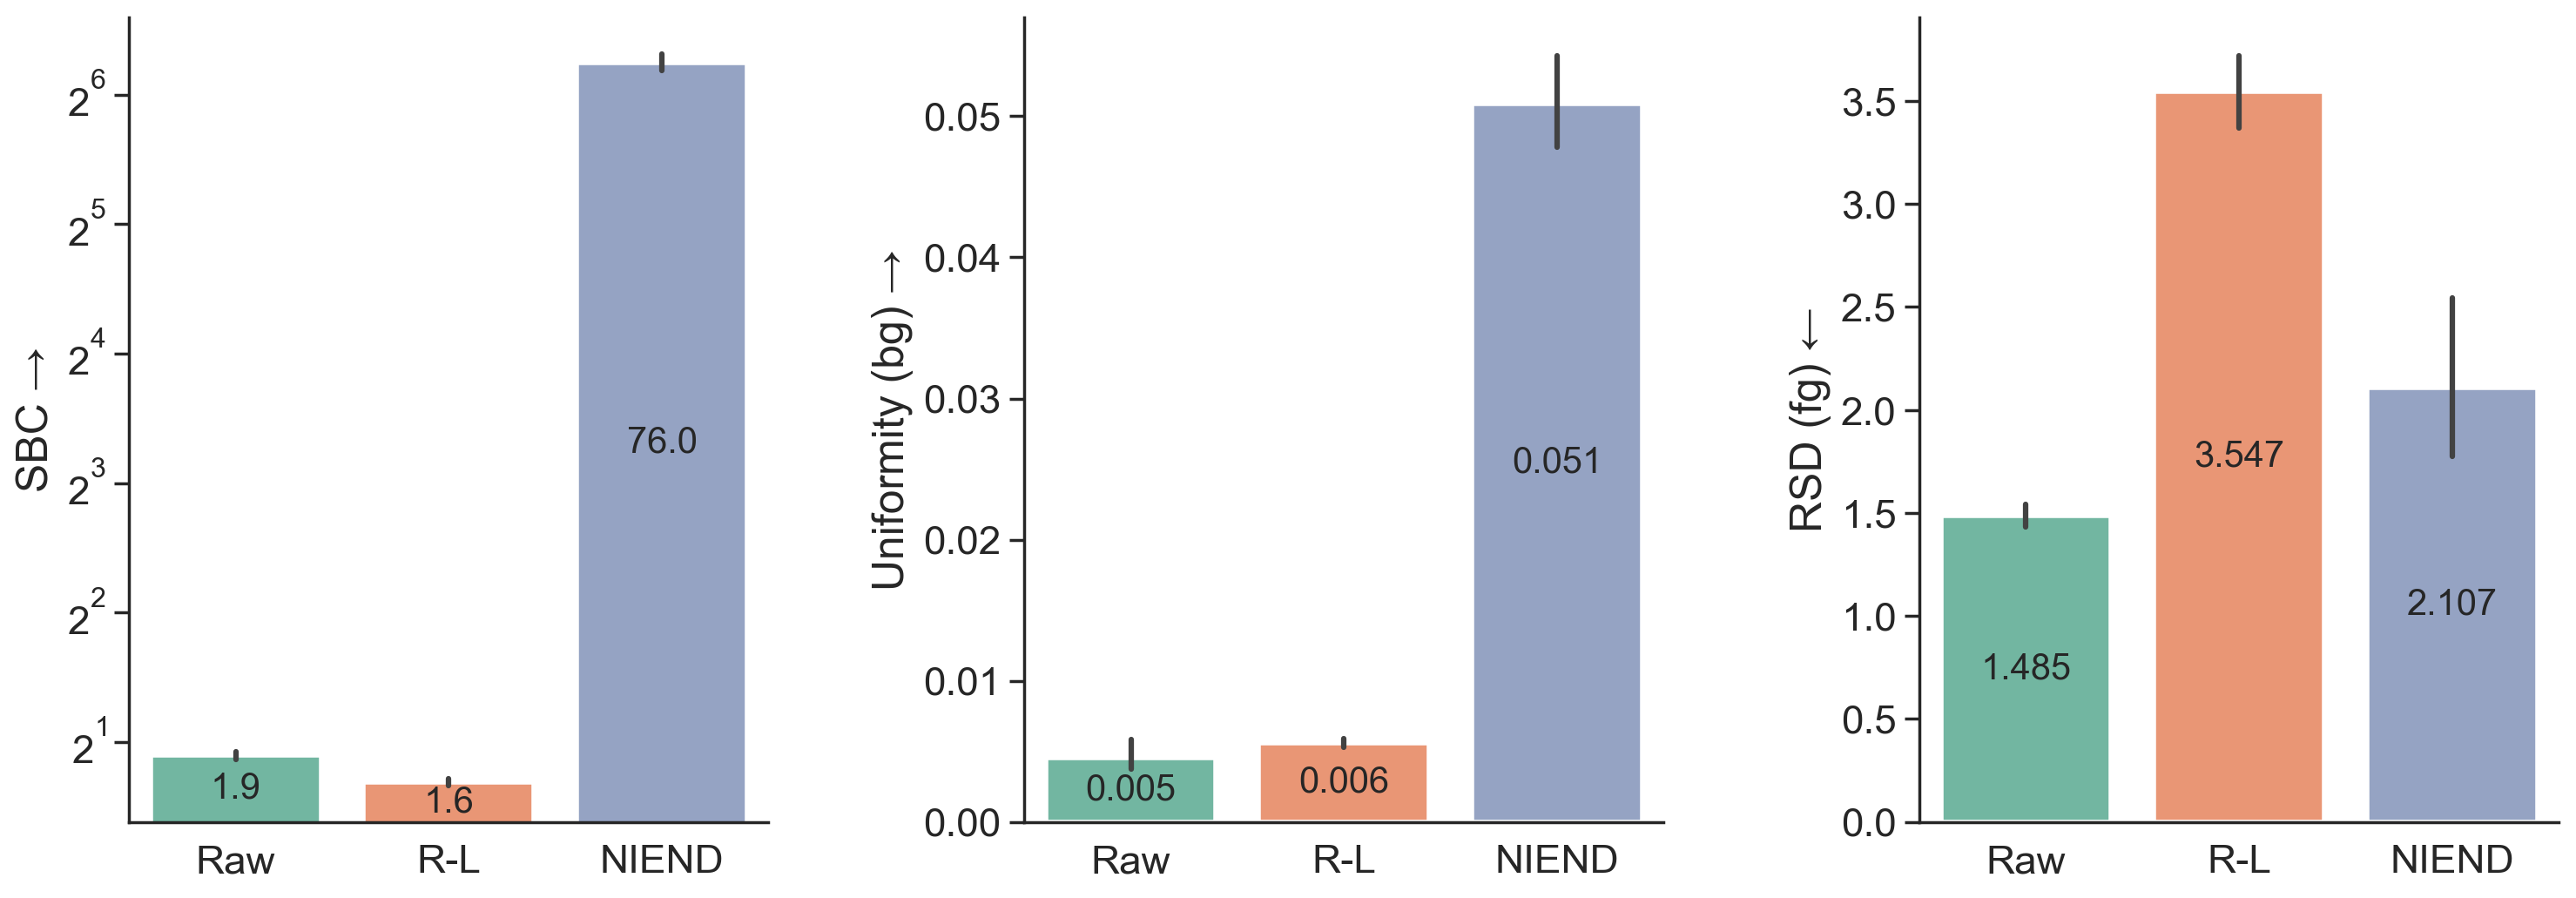

In [6]:
m = pd.pivot_table(df, values=['sbc', 'uni', 'rsd'], index='cond', aggfunc='mean')

fig, axs = plt.subplots(1, 3, figsize=(18,6), dpi=200)
fig.subplots_adjust(wspace=0.4)
ax = sns.barplot(df, x='cond', y='sbc', hue='cond', ax=axs[0], linewidth=2, palette='Set2')
ax.tick_params(left=True, direction='out')
sns.set(style='white', font_scale=1.5)
ax.set_xlabel(None)
ax.set_ylabel('SBC →')
ax.set_yscale('log', base=2)
for i in range(3):
    ax.bar_label(ax.containers[i], fmt='%.1f', fontsize=15, label_type='center')

ax = sns.barplot(df, x='cond', y='uni', hue='cond', ax=axs[1], linewidth=2, palette='Set2')
ax.tick_params(left=True, direction='out')
ax.set_xlabel(None)
ax.set_ylabel('Uniformity (bg) →')
for i in range(3):
    ax.bar_label(ax.containers[i], fmt='%.3f', fontsize=15, label_type='center')

ax = sns.barplot(df, x='cond', y='rsd', hue='cond', ax=axs[2], linewidth=2, palette='Set2')
ax.set_xlabel(None)
ax.set_ylabel('RSD (fg) ←')
ax.tick_params(left=True, direction='out')
for i in range(3):
    ax.bar_label(ax.containers[i], fmt='%.3f', fontsize=15, label_type='center')

sns.despine(fig)
# axs[0].tick_params(axis='x', rotation=30)
# axs[1].tick_params(axis='x', rotation=30)
# axs[2].tick_params(axis='x', rotation=30)


Text(0.5, 1.0, 'PSF kernel')

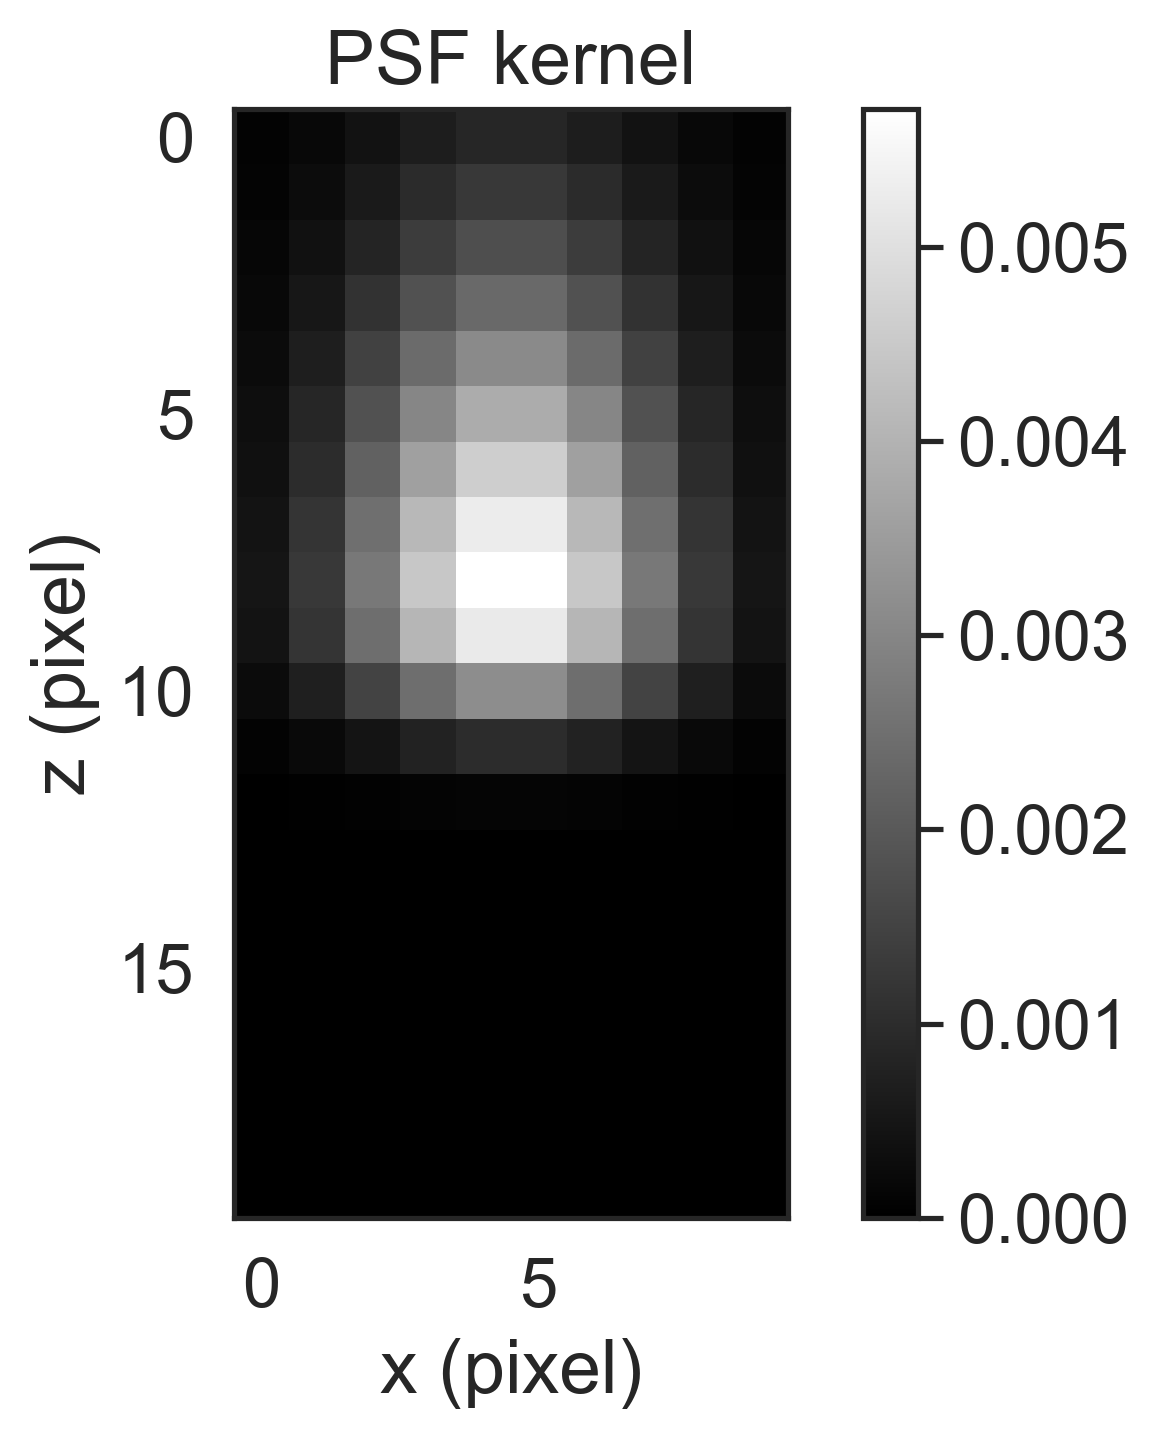

In [29]:
import numpy as np
from scipy.stats import skewnorm
from scipy.signal.windows import gaussian

def create_asymmetric_psf(size_xy, size_z, sigma_xy, sigma_z, skewness):
    # Create a 3D grid
    z, y, x = np.ogrid[-size_z//2:size_z//2, -size_xy//2:size_xy//2, -size_xy//2:size_xy//2]

    # Calculate the Gaussian distribution in the xy plane
    g = np.outer(gaussian(size_xy, sigma_xy), gaussian(size_xy, sigma_xy))
    gaussian_xy = np.repeat(g[np.newaxis, :, :], size_z, axis=0)

    # Calculate the skewed normal distribution in the z direction
    skewnorm_z = skewnorm.pdf(z, skewness, scale=sigma_z)

    # Multiply the two distributions to get the final PSF
    psf = gaussian_xy * skewnorm_z

    return psf / psf.sum()
sns.set(style='white', font_scale=1.5)
psf = create_asymmetric_psf(10, 20, 2, 5, -5)
plt.figure(dpi=300)
plt.imshow(psf.max(axis=1), cmap='gray')
plt.yticks([0, 5, 10, 15])
plt.xlabel('x (pixel)')
plt.ylabel('z (pixel)')
# plt.gca().yaxis.tick_right()
# plt.gca().yaxis.set_label_position("right")
plt.colorbar()
plt.title('PSF kernel')

## Showing the number of instance aware

In [31]:
inst = wkdir / 'instance_awareness.pickle'
with open(inst, 'rb') as f:
    inst = pickle.load(f)

count = 0
for thr, stat in inst:
    if stat - thr > 255:
        count += 1

print(count)

1860
